# **BootCamp DS - 20243**
## **Actividad 2**
### **Presentado por:** Diego Chávez

### Contexto: 
Luego de la retroalimentación respecto al primer entregable, decidí ampliar la información de mi dataset de tal manera que me permita jugar más adelante con los distintos algortimos que veremos. Por lo tanto, añadí tanto variables numéricas como categóricas, con esto tendré información más variada y enriquecedora para el ejercicio.

### **1. Breve exploración del conjunto de datos ampliado**

In [1]:
# importamos la librerías
import pandas as pd
import numpy as np
import os

In [2]:
## Cargamos el dataset
dataset = pd.read_excel(r"C:/Users/Diego Chavez/Desktop/BIT/BootCamp/BD.xlsx")

In [3]:
# tipos y columnas en el dataset
dataset.dtypes

TIPO                                                  object
Número de Documento                                   object
REFERIDO POR                                          object
Estado Desembolso                                     object
Desembolso realizado Contabilidad                      int64
Cliente: Nombre completo                              object
Fecha de formalización                        datetime64[ns]
Fecha del Depósito                            datetime64[ns]
Salario Reportado del cliente                        float64
Código Préstamo                                       object
Monto Bruto Prestado                                   int64
Listo para Desembolso                                  int64
Plazo                                                 object
Status Inicial                                        object
Desembolso Realizado                                   int64
Tecnología                                           float64
Administración sobre mon

In [4]:
# tamaño del dataset 
dataset.shape

(315472, 44)

In [5]:
dataset.head(3)

,TIPO,Número de Documento,REFERIDO POR,Estado Desembolso,Desembolso realizado Contabilidad,Cliente: Nombre completo,Fecha de formalización,Fecha del Depósito,Salario Reportado del cliente,Código Préstamo,...,Tasa interes,Tasa mora,GENERO,FECHA DE NACIMIENTO,Profesion u Ocupacion,UBICACIÓN,RIFM,INFLACIÓN,FGA,CASA DE COBRANZA
0,MINI,8505346,0,Desembolso Rechazado,0,Jose Luis Ardila,2024-06-14,2024-06-14,2317399.92,O-295356,...,0.3083,0.3083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MINI,1056781799,0,Desembolso Rechazado,0,Alexander Sierra vanegas,2023-05-17,2023-05-17,1922388.57,O-176143,...,24.87%,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MINI,45559700,alprestamo,Desembolso Rechazado,0,Maria Torres,2023-07-16,2023-07-16,0.00,O-193955,...,24.87%,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **2. Gráficos para el Dataset**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 2.1 Piechart

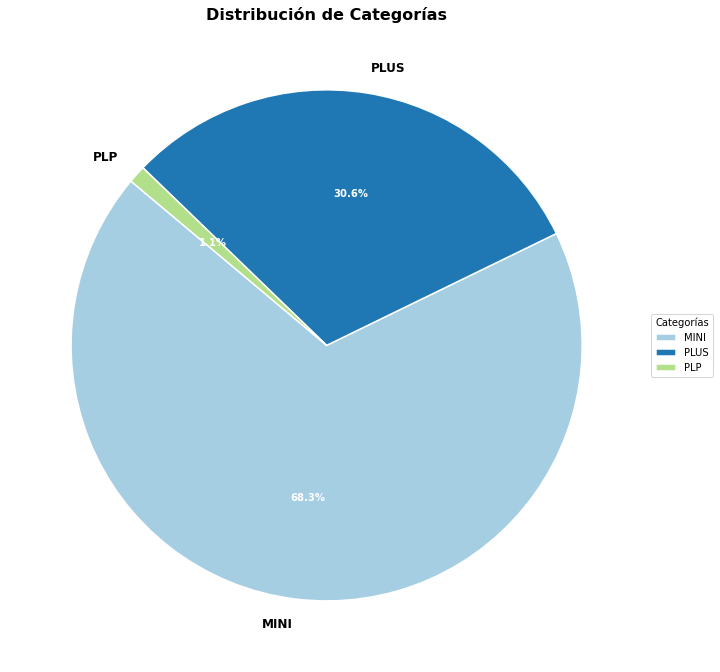

In [7]:
# Creamos un gráfico de torta usando Matplotlib

# hacemos un conteo por tipo de producto (MINI, PLUS, PLP)
cantidad_productos = dataset['TIPO'].value_counts()

# Cargamos una paleta de color
colores = plt.cm.Paired(range(len(cantidad_productos)))

# Generamos el gráfico de torta
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    cantidad_productos, 
    labels=cantidad_productos.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colores,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}  # Mejora los bordes de los segmentos
)

# Estilizamos los porcentajes de participación de cada producto
plt.setp(autotexts, size=10, weight="bold", color="white")  

# Estilizamos las etiquetas
plt.setp(texts, size=12, weight="bold") 

# Agregamos un título más grande y en negrita
plt.title('Distribución de Categorías', fontsize=16, weight="bold") 

# Añadimos una leyenda fuera del gráfico para cada prodcuto.
plt.legend(wedges, cantidad_productos.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ploteamos
plt.tight_layout()
plt.show()

#### Conclusiones
El gráfico muestra una distribución de
* 68,3% para el producto MINI.
* 30,6% para el producto PLUS.
* 1.1% para el producto PLP.

Lo cual cobra sentido ya que Rayo, es una empresa cuyo nicho objetivo son clientes con interés en préstamos a corto plazo y de bajo monto, los préstamos MINI son los que tienen un menor plazo y menor monto de colocación, de la misma forma se distribuyen los productos PLUS y PLP.

### 2.2 Histograma

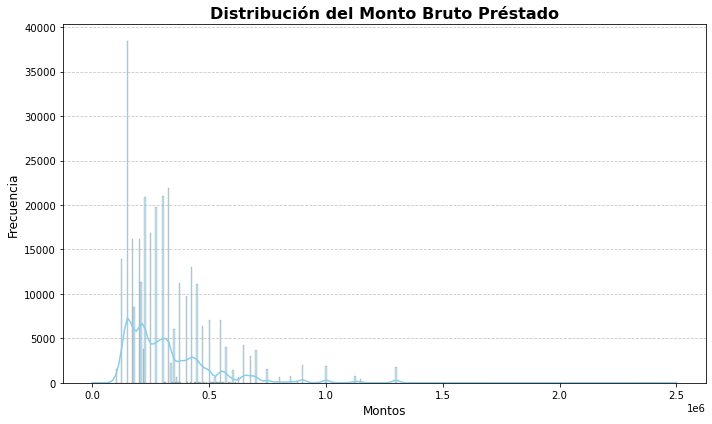

In [8]:
# creamos un histograma usando Seaborn
plt.figure(figsize=(10, 6))

# Establecemos los parámetros
sns.histplot(
    data=dataset, 
    x='Monto Bruto Prestado', 
    kde=True,  # curva de densidad
    color='skyblue',  # color de las barras
    edgecolor='black'  # bordes de las barras
)

# personalizamos el histograma aún más
plt.title('Distribución del Monto Bruto Préstado', fontsize=16, weight='bold')
plt.xlabel('Montos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de la cuadrícula
plt.tight_layout()

# pleatemos
plt.show()

#### Conclusiones
Siguiendo el mismo argumento, los montos predominantes se agrupan entre los 200.000 y 500.000 pesos colombianos, llegando a un tope de 2.500.000. Montos que corresponden en su mayoría a montos otorgados para el producto y MINI y los más lejanos para el producto PLP. 

#### 2.3 Barplot

In [10]:
# Barplt con Plotly
dataset['Fecha de procesamiento del desembolso'] = pd.to_datetime(dataset['Fecha de procesamiento del desembolso'])

# escogemos los años
dataset['año'] = dataset['Fecha de procesamiento del desembolso'].dt.to_period('Y')

# hacemos un conteo agrupando por año
ventas_por_mes = dataset.groupby('año')['Código Préstamo'].count().reset_index()
ventas_por_mes['año'] = ventas_por_mes['año'].astype(str)  # convertimos a string 

# seteamos los parámetros del gráfico
fig = px.bar(
    ventas_por_mes, 
    x='año', 
    y='Código Préstamo',
    title='Número de Ventas por Año',
    labels={'año_mes': 'Año y Mes', 'venta_id': 'Número de Ventas'},
    template='plotly_white',
    text='Código Préstamo'  
)

# configuraciones acidionales
fig.update_traces(textposition='outside') 
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Número de Ventas',
    xaxis_tickangle=-45 
)

# pleteamos
fig.show()


#### Conclusiones
La historia de Rayo arranca desde el 2019, teniendo una menor colacación en un principio, a la fecha, esta fintech a venido experimentando un crecimiento en su colocación anual. Para el año 2024, se planteó una estrategia de disminución en la colocación por distintas políticas internas.